#pengumpulan data





##data diambil dari kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d ismailpromus/skin-diseases-image-dataset

Dataset URL: https://www.kaggle.com/datasets/ismailpromus/skin-diseases-image-dataset
License(s): copyright-authors
100% 5.19G/5.19G [03:57<00:00, 21.3MB/s]
100% 5.19G/5.19G [03:57<00:00, 23.4MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/skin-diseases-image-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

#import module

In [ ]:
!pip install imbalanced-learn


In [ ]:
import os
from PIL import Image
import numpy as np
import random
import shutil
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [ ]:
random.seed(69)

#persiapan data

In [ ]:
folder_path = [
    '/content/IMG_CLASSES/1. Eczema 1677/',
    '/content/IMG_CLASSES/2. Melanoma 15.75k/',
    '/content/IMG_CLASSES/3. Atopic Dermatitis - 1.25k/',
    '/content/IMG_CLASSES/4. Basal Cell Carcinoma (BCC) 3323/',
    '/content/IMG_CLASSES/5. Melanocytic Nevi (NV) - 7970/',
    '/content/IMG_CLASSES/6. Benign Keratosis-like Lesions (BKL) 2624/',
    '/content/IMG_CLASSES/7. Psoriasis pictures Lichen Planus and related diseases - 2k/',
    '/content/IMG_CLASSES/8. Seborrheic Keratoses and other Benign Tumors - 1.8k/',
    '/content/IMG_CLASSES/9. Tinea Ringworm Candidiasis and other Fungal Infections - 1.7k/',
    '/content/IMG_CLASSES/10. Warts Molluscum and other Viral Infections - 2103/'
]

X = []
y = []

for label, folder in enumerate(folder_path):
    for img_file in os.listdir(folder):
        img_path = os.path.join(folder, img_file)
        X.append(img_path)
        y.append(label)

##data imbalance

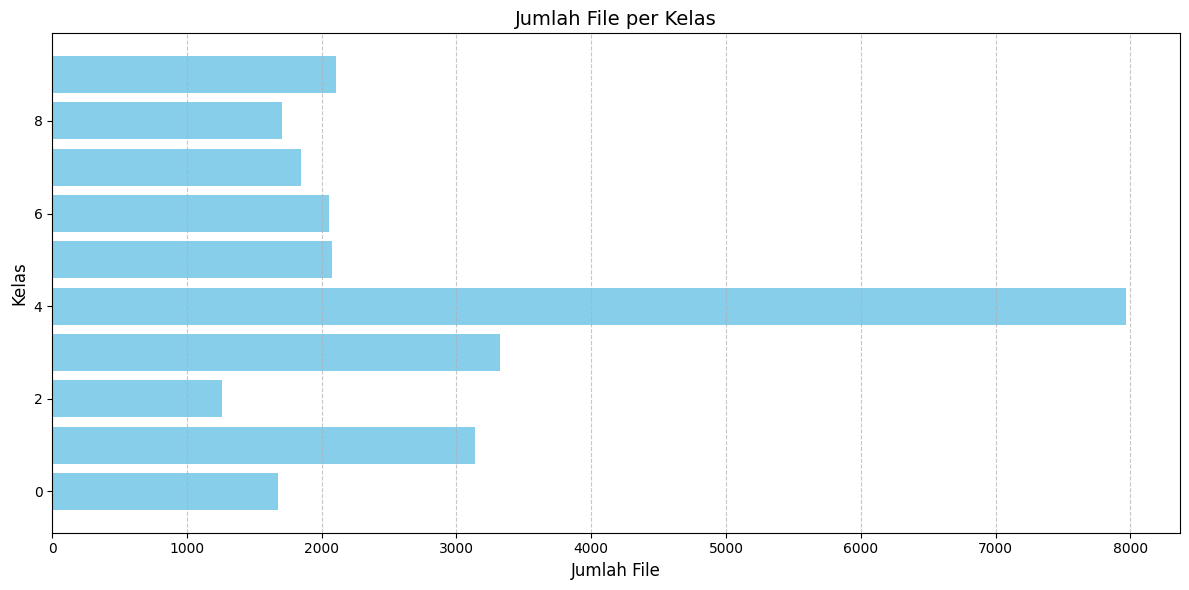

In [ ]:
from collections import Counter
label_counts = Counter(y)
plt.figure(figsize=(12, 6))
plt.barh(list(label_counts.keys()), list(label_counts.values()), color='skyblue')
plt.xlabel('Jumlah File', fontsize=12)
plt.ylabel('Kelas', fontsize=12)
plt.title('Jumlah File per Kelas', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


karena terdapat 1 kelas yang memiliki data terlalu banyak kami memutuskan untuk melakukan undersampling agar data balance

In [ ]:
undersampler = RandomUnderSampler(random_state=42)

X_resampled, y_resampled = undersampler.fit_resample(np.array(X), y)

resampled_class_distribution = Counter(y_resampled)

In [ ]:
print(resampled_class_distribution)


Counter({0: 1257, 1: 1257, 2: 1257, 3: 1257, 4: 1257, 5: 1257, 6: 1257, 7: 1257, 8: 1257, 9: 1257})


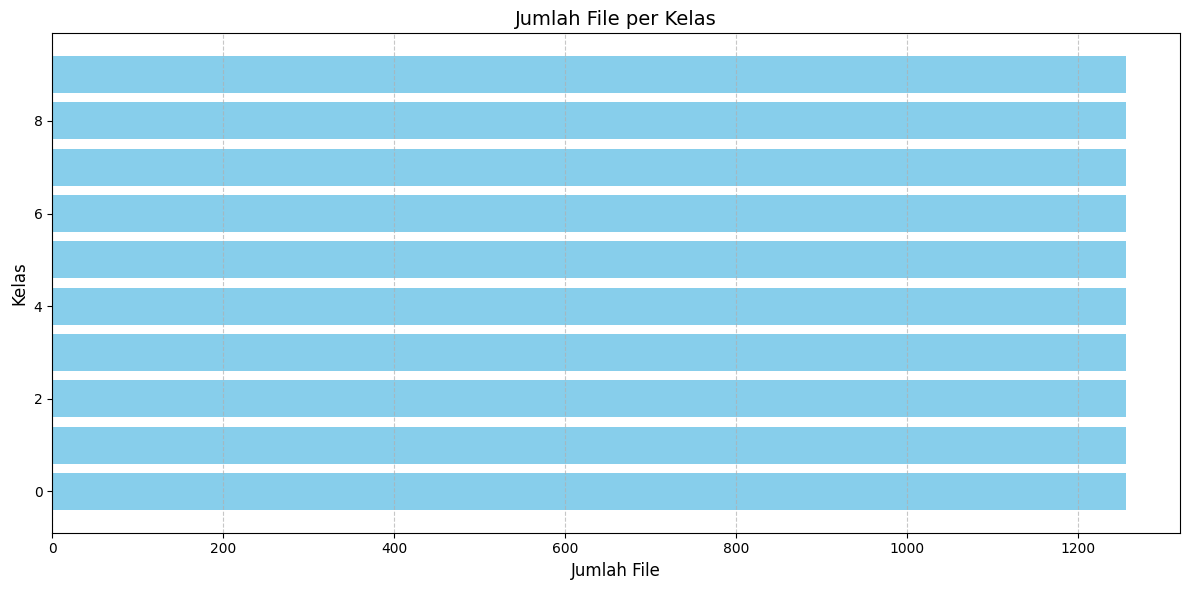

In [ ]:
from collections import Counter
label_counts = Counter(y_resampled)
plt.figure(figsize=(12, 6))
plt.barh(list(label_counts.keys()), list(label_counts.values()), color='skyblue')
plt.xlabel('Jumlah File', fontsize=12)
plt.ylabel('Kelas', fontsize=12)
plt.title('Jumlah File per Kelas', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##resize dan normalisasi

In [ ]:
IMG_SIZE = (224, 224)

def load_and_resize_image(img_path, img_size=IMG_SIZE):
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)
    return img_array

resized_images = [load_and_resize_image(img_path) for img_path in X_resampled if isinstance(img_path, str)]

resized_images = np.array(resized_images)

resized_images = resized_images / 255.0

##augmentasi

#model